In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from functools import reduce
import scipy
from copy import deepcopy
from scipy.linalg import logm
import numpy as np
import dill


In [3]:
import dill 
num_keep = 200
filename = 'pickled_controls5.pkl'
pca = dill.load(open(filename, 'rb'))
pca.controlset = pca.controlset[:num_keep]

In [4]:
def hist_and_support(weights, num=10):
    plt.hist(weights)
    np.argmax(weights)
    top_idx = np.argsort(np.array(weights).T)[0][-num:]
    top_values = [weights[i] for i in top_idx]
    print(f"SUPPORT:{np.sum(top_values)}")
    print(f"NUM CONTROLS: {num}")
    return top_idx, np.sum(top_values)

In [5]:
num_weights = 10
scale = 100
num_points = 11
num_processors = 4

In [6]:
from convex import all_derivs, optimal_weights_1st_order, optimal_weights
from pauli_channel_approximation import PCA
# If the tolerance is too high (i.e. not zero) and the number of controls is too high (e.g. >100) this was failing with ECOS.
pca.derivs = all_derivs(pca.controlset, pca.target_operator, pca.control_hamiltonians, pca.ambient_hamiltonian, pca.dt, 1)

Control 0 derivative.
Control 1 derivative.
Control 2 derivative.
Control 3 derivative.
Control 4 derivative.
Control 5 derivative.
Control 6 derivative.
Control 7 derivative.
Control 8 derivative.
Control 9 derivative.
Control 10 derivative.
Control 11 derivative.
Control 12 derivative.
Control 13 derivative.
Control 14 derivative.
Control 15 derivative.
Control 16 derivative.
Control 17 derivative.
Control 18 derivative.
Control 19 derivative.
Control 20 derivative.
Control 21 derivative.
Control 22 derivative.
Control 23 derivative.
Control 24 derivative.
Control 25 derivative.
Control 26 derivative.
Control 27 derivative.
Control 28 derivative.
Control 29 derivative.
Control 30 derivative.
Control 31 derivative.
Control 32 derivative.
Control 33 derivative.
Control 34 derivative.
Control 35 derivative.
Control 36 derivative.
Control 37 derivative.
Control 38 derivative.
Control 39 derivative.
Control 40 derivative.
Control 41 derivative.
Control 42 derivative.
Control 43 derivative

Control 151 derivative.
Control 152 derivative.
Control 153 derivative.
Control 154 derivative.
Control 155 derivative.
Control 156 derivative.
Control 157 derivative.
Control 158 derivative.
Control 159 derivative.
Control 160 derivative.
Control 161 derivative.
Control 162 derivative.
Control 163 derivative.
Control 164 derivative.
Control 165 derivative.
Control 166 derivative.
Control 167 derivative.
Control 168 derivative.
Control 169 derivative.
Control 170 derivative.
Control 171 derivative.
Control 172 derivative.
Control 173 derivative.
Control 174 derivative.
Control 175 derivative.
Control 176 derivative.
Control 177 derivative.
Control 178 derivative.
Control 179 derivative.
Control 180 derivative.
Control 181 derivative.
Control 182 derivative.
Control 183 derivative.
Control 184 derivative.
Control 185 derivative.
Control 186 derivative.
Control 187 derivative.
Control 188 derivative.
Control 189 derivative.
Control 190 derivative.
Control 191 derivative.
Control 192 deri

# Making the regularizer too small can prevent it from working - i.e. the solver will fail. Anything above around 1E-3 or 1E-4 seems to work well. These cells assign the 0RBC weights, and 1RBC weights, with sparsity constraints. (This could be because the constraint makes the optimization work over numbers small in magnitude, so that numerical inaccuracy takes over.)

# Support for 0th order controls

In [7]:
# MAX_TO_SUPPORT_RATIO = 1
# def cost_function(l, pca):
#     try:
#         PCA.assign_weights_0(pca, l)
#         indices, support = hist_and_support(pca.weights_0)
#         plt.show()
#         plt.clf()
#         maximum = max(pca.weights_0[indices])
#         rtn = (maximum*MAX_TO_SUPPORT_RATIO + (1 - support))
#         print(f"cost function: {rtn}")
#         print(f"Evaluated with l={l}")
#     except TypeError:
#         rtn = MAX_TO_SUPPORT_RATIO + 1
#     return rtn

In [8]:
# from scipy.optimize import minimize

# THRESHOLD_SUPPORT = .9
# THRESHOLD_MAXIMUM = .5

# def find_l(pca, l0=1E-6): #initial guess is l0
#     l = minimize(lambda l: cost_function(l, pca), x0=l0)
#     return l

In [9]:
# l = find_l(pca)

In [10]:
# cost_function(l.x, pca)

In [11]:
pca.weights_0 = optimal_weights(pca.derivs[:1], sparsity=True, sparsity_param=1E-3)

Done with convex problem 0 out of 200
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type     

19  3.6e-08  3.6e-08  2.5e-04  7.38e-01   1.833285790e-03   1.833233993e-03   3.6e-08  0.03  
20  5.9e-10  6.0e-10  3.1e-05  9.79e-01   1.803363587e-03   1.803362872e-03   5.9e-10  0.03  
Optimizer terminated. Time: 0.04    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.8033635866e-03    nrm: 6e+02    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.8033628723e-03    nrm: 1e+00    Viol.  con: 4e-19    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.563136230e-02   2.470356093e-02   1.6e-03  0.05  
11  5.7e-04  5.7e-04  1.1e-01  5.17e-01   1.548907353e-02   1.506226633e-02   5.7e-04  0.05  
12  2.1e-04  2.1e-04  6.0e-02  7.15e-01   1.261895921e-02   1.243951925e-02   2.1e-04  0.05  
13  1.0e-04  1.0e-04  2.9e-02  2.59e-01   7.666989991e-03   7.570041151e-03   1.0e-04  0.05  
14  2.9e-05  2.9e-05  1.5e-02  7.44e-01   6.624094248e-03   6.587260957e-03   2.9e-05  0.05  
15  1.0e-05  1.0e-05  6.3e-03  3.72e-01   4.063596743e-03   4.053841546e-03   1.0e-05  0.06  
16  3.3e-06  3.3e-06  3.2e-03  7.00e-01   3.455941690e-03   3.453689584e-03   3.3e-06  0.06  
17  1.2e-06  1.2e-06  1.4e-03  4.21e-01   2.290168175e-03   2.291327031e-03   1.2e-06  0.06  
18  3.7e-07  3.7e-07  7.4e-04  7.74e-01   2.047553605e-03   2.047917478e-03   3.7e-07  0.06  
19  8.6e-08  8.6e-08  3.2e-04  6.48e-01   1.649267915e-03   1.649381022e-03   8.6e-08  0.06  
20  7.5e-09  7.5e-09  9.0e-05  9.09e-01   1.551390076e-03   

3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.839349673e-01   8.095927577e-02   1.3e-01  0.04  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.271142116e-01   1.466179320e-01   1.0e-01  0.04  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.552347945e-01   5.574979756e-02   9.4e-02  0.04  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.086535473e-01   8.355811309e-02   4.7e-02  0.04  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.769131352e-02   5.495237774e-02   2.5e-02  0.04  
8   1.0e-02  1.0e-02  9.5e-01  1.61e+00   5.458040182e-02   5.024972121e-02   1.0e-02  0.04  
9   5.8e-03  5.8e-03  5.0e-01  5.85e-01   3.193377352e-02   2.857836313e-02   5.8e-03  0.04  
10  1.6e-03  1.6e-03  2.6e-01  1.07e+00   2.566796377e-02   2.473826249e-02   1.6e-03  0.04  
11  5.7e-04  5.7e-04  1.1e-01  5.21e-01   1.556011103e-02   1.513063472e-02   5.7e-04  0.04  
12  2.1e-04  2.1e-04  6.1e-02  7.22e-01   1.273200101e-02   1.255185780e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  3.0e-02  2.74e-01   7.778788148e-03   

Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707425110e+00   -7.919477472e-02  3.3e-01  0.05  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469412990e-01   1.050729166e-02   1.6e-01  0.05  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837922484e-01   8.081470917e-02   1.3e-01  0.05  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00 

Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Fac

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

18  2.8e-07  2.8e-07  7.9e-04  8.25e-01   2.443977410e-03   2.443705816e-03   2.8e-07  0.02  
19  5.7e-08  5.7e-08  3.5e-04  8.38e-01   2.252531057e-03   2.252448681e-03   5.7e-08  0.02  
20  1.5e-09  1.5e-09  6.1e-05  9.67e-01   2.204811435e-03   2.204807662e-03   1.5e-09  0.02  
Optimizer terminated. Time: 0.03    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 2.2048114354e-03    nrm: 5e+02    Viol.  con: 3e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 2.2048076621e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 3e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0            

11  5.7e-04  5.7e-04  1.1e-01  5.22e-01   1.558062668e-02   1.514950702e-02   5.7e-04  0.05  
12  2.1e-04  2.1e-04  6.1e-02  7.24e-01   1.277001898e-02   1.258916590e-02   2.1e-04  0.05  
13  1.0e-04  1.0e-04  3.0e-02  2.75e-01   7.804705953e-03   7.706636550e-03   1.0e-04  0.05  
14  2.9e-05  2.9e-05  1.6e-02  7.51e-01   6.782000903e-03   6.744466612e-03   2.9e-05  0.05  
15  1.0e-05  1.0e-05  6.5e-03  3.91e-01   4.229266560e-03   4.218262225e-03   1.0e-05  0.05  
16  3.3e-06  3.3e-06  3.4e-03  7.12e-01   3.629301158e-03   3.626096657e-03   3.3e-06  0.05  
17  1.1e-06  1.1e-06  1.5e-03  4.62e-01   2.481052738e-03   2.481049484e-03   1.1e-06  0.05  
18  3.1e-07  3.1e-07  7.5e-04  8.13e-01   2.251612108e-03   2.251551012e-03   3.1e-07  0.05  
19  6.1e-08  6.1e-08  3.3e-04  7.82e-01   2.001248131e-03   2.001199664e-03   6.1e-08  0.05  
20  6.2e-10  6.4e-10  3.3e-05  9.57e-01   1.940179528e-03   1.940178863e-03   6.2e-10  0.05  
Optimizer terminated. Time: 0.06    


Interior-point soluti

3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.839676907e-01   8.100265644e-02   1.3e-01  0.02  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.271207517e-01   1.466191869e-01   1.0e-01  0.02  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.552545635e-01   5.576519890e-02   9.4e-02  0.02  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.086514133e-01   8.355262922e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.768707584e-02   5.495064858e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.61e+00   5.458327142e-02   5.025225690e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  5.0e-01  5.85e-01   3.193275041e-02   2.857880865e-02   5.8e-03  0.03  
10  1.6e-03  1.6e-03  2.6e-01  1.07e+00   2.568748241e-02   2.475915847e-02   1.6e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.23e-01   1.559771270e-02   1.517041087e-02   5.7e-04  0.03  
12  2.1e-04  2.1e-04  6.1e-02  7.23e-01   1.277214103e-02   1.259270435e-02   2.1e-04  0.03  
13  1.0e-04  1.0e-04  3.0e-02  2.80e-01   7.837052395e-03   

Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707399286e+00   -7.920719287e-02  3.3e-01  0.05  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469086815e-01   1.048223886e-02   1.6e-01  0.05  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837390015e-01   8.076444728e-02   1.3e-01  0.05  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.269942071e-01   1.464923940e-01   1.0e-01  0.05  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.550259930e-01   5.547954077e-02   9.4e-02  0.05  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085624054e-01   8.342249373e-02   4.7e-02  0.05  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.76018791

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 3

  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix vari

20  6.3e-09  6.3e-09  1.3e-04  9.59e-01   2.142395168e-03   2.142377539e-03   6.3e-09  0.05  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 2.1423951677e-03    nrm: 5e+02    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 2.1423775386e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 1e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

12  2.1e-04  2.1e-04  6.1e-02  7.19e-01   1.268435731e-02   1.250436871e-02   2.1e-04  0.05  
13  1.0e-04  1.0e-04  3.0e-02  2.67e-01   7.730544137e-03   7.633231099e-03   1.0e-04  0.06  
14  2.9e-05  2.9e-05  1.6e-02  7.48e-01   6.694771622e-03   6.657757188e-03   2.9e-05  0.06  
15  1.0e-05  1.0e-05  6.4e-03  3.85e-01   4.150667576e-03   4.140379099e-03   1.0e-05  0.06  
16  3.3e-06  3.3e-06  3.2e-03  7.10e-01   3.550504042e-03   3.547779802e-03   3.3e-06  0.06  
17  1.2e-06  1.2e-06  1.5e-03  4.58e-01   2.471700912e-03   2.471893526e-03   1.2e-06  0.07  
18  3.2e-07  3.2e-07  7.4e-04  7.66e-01   2.172932558e-03   2.172965848e-03   3.2e-07  0.07  
19  2.9e-08  2.9e-08  2.2e-04  7.55e-01   1.849001431e-03   1.848964251e-03   2.9e-08  0.07  
20  3.0e-10  3.0e-10  2.2e-05  9.79e-01   1.823360272e-03   1.823360012e-03   3.0e-10  0.07  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.550251032e-01   5.548276548e-02   9.4e-02  0.05  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085547423e-01   8.341768172e-02   4.7e-02  0.05  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.759690305e-02   5.484109313e-02   2.5e-02  0.05  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.455318140e-02   5.022101627e-02   1.0e-02  0.05  
9   5.8e-03  5.8e-03  4.9e-01  5.83e-01   3.184386217e-02   2.848319563e-02   5.8e-03  0.05  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.561265000e-02   2.468504442e-02   1.6e-03  0.05  
11  5.7e-04  5.7e-04  1.1e-01  5.16e-01   1.546447428e-02   1.503734227e-02   5.7e-04  0.06  
12  2.1e-04  2.1e-04  6.0e-02  7.14e-01   1.259163417e-02   1.241182233e-02   2.1e-04  0.06  
13  1.0e-04  1.0e-04  2.9e-02  2.52e-01   7.625850946e-03   7.528374558e-03   1.0e-04  0.06  
14  2.9e-05  2.9e-05  1.5e-02  7.40e-01   6.580049861e-03   6.542969637e-03   2.9e-05  0.06  
15  1.1e-05  1.1e-05  6.3e-03  3.53e-01   3.981362922e-03   

Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707417607e+00   -7.919841824e-02  3.3e-01  0.04  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469151916e-01   1.048493040e-02   1.6e-01  0.04  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837445996e-01   8.077151977e-02   1.3e-01  0.04  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.270033180e-01   1.464993858e-01   1.0e-01  0.04  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.550369971e-01   5.548665528e-02   9.4e-02  0.04  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085765972e-01   8.343406015e-02   4.7e-02  0.04  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.761247004e-02   5.485833503e-02   2.5e-02  0.05  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.455286240e-0

  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             :

  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer var

19  8.5e-09  8.5e-09  1.7e-08  8.63e-01   2.175847104e-03   2.175830767e-03   8.5e-09  0.03  
Optimizer terminated. Time: 0.04    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 2.1758471038e-03    nrm: 5e+02    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 2.1758307670e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

13  1.0e-04  1.0e-04  2.9e-02  2.53e-01   7.641225561e-03   7.543334959e-03   1.0e-04  0.03  
14  2.9e-05  2.9e-05  1.5e-02  7.40e-01   6.596935391e-03   6.559685281e-03   2.9e-05  0.03  
15  1.1e-05  1.1e-05  6.3e-03  3.54e-01   3.993855822e-03   3.984238194e-03   1.1e-05  0.03  
16  3.5e-06  3.5e-06  3.2e-03  6.86e-01   3.373342821e-03   3.371483655e-03   3.5e-06  0.03  
17  1.4e-06  1.4e-06  1.4e-03  3.64e-01   2.146309240e-03   2.148796327e-03   1.4e-06  0.03  
18  4.1e-07  4.1e-07  7.1e-04  7.47e-01   1.890123337e-03   1.891082160e-03   4.1e-07  0.05  
19  1.0e-07  1.0e-07  2.8e-04  5.36e-01   1.346783661e-03   1.347509416e-03   1.0e-07  0.05  
20  2.9e-08  2.9e-08  1.4e-04  8.62e-01   1.253416798e-03   1.253645717e-03   2.9e-08  0.05  
21  1.1e-08  1.1e-08  9.0e-05  9.06e-01   1.207588858e-03   1.207649130e-03   1.1e-08  0.05  
22  4.3e-10  4.5e-10  1.8e-05  9.60e-01   1.178916755e-03   1.178919362e-03   4.3e-10  0.05  
Optimizer terminated. Time: 0.06    


Interior-point soluti

3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837680638e-01   8.079009444e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.270172894e-01   1.465177929e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.550647808e-01   5.553132067e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085836368e-01   8.345308361e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.762012155e-02   5.486758128e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.455595696e-02   5.022430392e-02   1.0e-02  0.04  
9   5.8e-03  5.8e-03  4.9e-01  5.83e-01   3.185991621e-02   2.850011622e-02   5.8e-03  0.04  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.561920490e-02   2.469076763e-02   1.6e-03  0.04  
11  5.7e-04  5.7e-04  1.1e-01  5.16e-01   1.547555839e-02   1.504729020e-02   5.7e-04  0.04  
12  2.1e-04  2.1e-04  6.0e-02  7.15e-01   1.261086776e-02   1.243059072e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  2.9e-02  2.53e-01   7.637748306e-03   

Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707505943e+00   -7.915582208e-02  3.3e-01  0.04  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469414700e-01   1.049348200e-02   1.6e-01  0.04  
3   1.3e-01  1.3e-01  2.7e+00  4.13e

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00    

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416         

17  1.0e-06  1.0e-06  1.5e-03  4.82e-01   2.514818613e-03   2.514467604e-03   1.0e-06  0.06  
18  3.4e-07  3.4e-07  8.2e-04  7.99e-01   2.285179336e-03   2.284961104e-03   3.4e-07  0.06  
19  1.2e-07  1.2e-07  4.8e-04  7.70e-01   2.083297166e-03   2.083168660e-03   1.2e-07  0.07  
20  5.8e-08  5.8e-08  3.4e-04  9.08e-01   2.016026500e-03   2.015918364e-03   5.8e-08  0.07  
21  3.1e-09  3.1e-09  7.8e-05  9.52e-01   1.958236881e-03   1.958231377e-03   3.1e-09  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.9582368811e-03    nrm: 5e+02    Viol.  con: 8e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.9582313774e-03    nrm: 1e+00    Viol.  con: 9e-19    var: 8e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 4

8   1.0e-02  1.0e-02  9.5e-01  1.61e+00   5.455604613e-02   5.022596504e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.83e-01   3.186658766e-02   2.850899773e-02   5.8e-03  0.03  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.561272967e-02   2.468476941e-02   1.6e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.17e-01   1.547603607e-02   1.504794571e-02   5.7e-04  0.03  
12  2.1e-04  2.1e-04  6.0e-02  7.16e-01   1.261908888e-02   1.243891705e-02   2.1e-04  0.03  
13  1.0e-04  1.0e-04  2.9e-02  2.54e-01   7.646948149e-03   7.549150909e-03   1.0e-04  0.03  
14  2.9e-05  2.9e-05  1.5e-02  7.41e-01   6.606768212e-03   6.569538790e-03   2.9e-05  0.04  
15  1.1e-05  1.1e-05  6.3e-03  3.56e-01   4.007743222e-03   3.998063241e-03   1.1e-05  0.04  
16  3.5e-06  3.5e-06  3.2e-03  6.88e-01   3.389484882e-03   3.387544445e-03   3.5e-06  0.04  
17  1.3e-06  1.3e-06  1.4e-03  3.76e-01   2.173362362e-03   2.175550666e-03   1.3e-06  0.04  
18  4.0e-07  4.0e-07  7.1e-04  7.54e-01   1.920113194e-03   

0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707408678e+00   -7.920264657e-02  3.3e-01  0.05  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469386152e-01   1.050780688e-02   1.6e-01  0.05  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837930456e-01   8.081356099e-02   1.3e-01  0.05  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.270433164e-01   1.465433203e-01   1.0e-01  0.05  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.551032705e-01   5.557445604e-02   9.4e-02  0.06  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.086143840e-01   8.348739074e-02   4.7e-02  0.06  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.764631046e-02   5.489736817e-02   2.5e-02  0.06  
8   1.0e-02  1.0e-02  9.5e-01  1.61e+00   5.455982822e-02   5.022958079e-02   1.0e-02  0.06  
9   5.8e-03  5.8e-03  4.9e-01  5.83e-01   3.188026954e-02   2.852269858e-02   5.8e-03  0.06  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.562178445e-02   

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00

Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - C

21  2.6e-09  2.7e-09  5.3e-09  9.84e-01   1.880937288e-03   1.880927363e-03   2.6e-09  0.04  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.8809372878e-03    nrm: 5e+02    Viol.  con: 7e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.8809273627e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 7e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

13  1.0e-04  1.0e-04  2.9e-02  2.66e-01   7.705823387e-03   7.609640789e-03   1.0e-04  0.07  
14  2.9e-05  2.9e-05  1.5e-02  7.48e-01   6.678747559e-03   6.642103255e-03   2.9e-05  0.07  
15  1.0e-05  1.0e-05  6.3e-03  3.88e-01   4.147581262e-03   4.137506406e-03   1.0e-05  0.07  
16  3.3e-06  3.3e-06  3.2e-03  7.10e-01   3.550175384e-03   3.547498613e-03   3.3e-06  0.07  
17  1.3e-06  1.3e-06  1.6e-03  4.64e-01   2.591187045e-03   2.591038370e-03   1.3e-06  0.07  
18  4.0e-07  4.0e-07  8.3e-04  7.38e-01   2.245462941e-03   2.245628147e-03   4.0e-07  0.07  
19  1.6e-07  1.6e-07  5.4e-04  7.97e-01   2.049979898e-03   2.049865212e-03   1.6e-07  0.07  
20  1.1e-08  1.1e-08  1.3e-04  8.86e-01   1.905278294e-03   1.905279557e-03   1.1e-08  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.9052782936e-03    nrm: 5e+02    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Du

7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.764205968e-02   5.489432995e-02   2.5e-02  0.05  
8   1.0e-02  1.0e-02  9.5e-01  1.61e+00   5.456727867e-02   5.023755147e-02   1.0e-02  0.05  
9   5.8e-03  5.8e-03  4.9e-01  5.84e-01   3.189049530e-02   2.853528098e-02   5.8e-03  0.06  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.562986182e-02   2.470311240e-02   1.5e-03  0.06  
11  5.7e-04  5.7e-04  1.1e-01  5.19e-01   1.551501831e-02   1.508860011e-02   5.7e-04  0.06  
12  2.1e-04  2.1e-04  6.0e-02  7.19e-01   1.267233914e-02   1.249327040e-02   2.1e-04  0.06  
13  1.0e-04  1.0e-04  2.9e-02  2.69e-01   7.730696881e-03   7.634234233e-03   1.0e-04  0.06  
14  2.9e-05  2.9e-05  1.6e-02  7.49e-01   6.701195113e-03   6.664390480e-03   2.9e-05  0.06  
15  9.9e-06  9.9e-06  6.4e-03  3.90e-01   4.169664959e-03   4.159386010e-03   9.9e-06  0.06  
16  3.2e-06  3.2e-06  3.2e-03  7.15e-01   3.574235739e-03   3.571472419e-03   3.2e-06  0.06  
17  1.1e-06  1.1e-06  1.5e-03  4.83e-01   2.524547115e-03   

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707451757e+00   -7.918193591e-02  3.3e-01  0.03  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469143016e-01   1.047819762e-02   1.6e-01  0.03  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837217449e-01   8.075407700e-02   1.3e-01  0.04  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.269769872e-01   1.464708144e-01   1.0e-01  0.04  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549969707e-01   5.543563551e-02   9.4e-02  0.04  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085463694e-01   8.339581068e-02   4.7e-02  0.04  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.758686771e-02   5.482949128e-02   2.5e-02  0.04  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.454981410e-02   5.021863022e-02   1.0e-02  0.04  
9   5.8e-03  5.8e-03  4.9e-01  5.82e-01   3.183300444e-02   

Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707406424e+00   -7.920366722e-02  3.3e-01  0.04  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469244484e-01   1.049542369e-02   1.6e-01  0.0


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.5434410127e-03    nrm: 6e+02    Viol.  con: 1e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.5434407627e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 1e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

14  2.8e-05  2.8e-05  1.5e-02  7.50e-01   6.659110233e-03   6.623237926e-03   2.8e-05  0.07  
15  9.6e-06  9.6e-06  6.2e-03  4.00e-01   4.173280057e-03   4.163487418e-03   9.6e-06  0.07  
16  3.1e-06  3.1e-06  3.2e-03  7.20e-01   3.587460359e-03   3.584767808e-03   3.1e-06  0.07  
17  1.2e-06  1.2e-06  1.7e-03  5.08e-01   2.742037553e-03   2.741365865e-03   1.2e-06  0.07  
18  2.8e-07  2.8e-07  8.2e-04  7.35e-01   2.321590198e-03   2.321079043e-03   2.8e-07  0.07  
19  5.1e-08  5.1e-08  3.6e-04  8.35e-01   2.122859385e-03   2.122708561e-03   5.1e-08  0.07  
20  1.4e-09  1.4e-09  5.8e-05  9.63e-01   2.077222130e-03   2.077218171e-03   1.4e-09  0.07  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 2.0772221295e-03    nrm: 5e+02    Viol.  con: 3e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 2.0772181708e-03    nrm: 1e+00    Viol.  con: 2e-18    var: 3e-09    cones: 0e+00 

8   1.0e-02  1.0e-02  9.5e-01  1.61e+00   5.459073157e-02   5.026505079e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  5.0e-01  5.86e-01   3.199188300e-02   2.864423844e-02   5.8e-03  0.03  
10  1.6e-03  1.6e-03  2.6e-01  1.07e+00   2.567285959e-02   2.474220630e-02   1.6e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.24e-01   1.559634954e-02   1.516471561e-02   5.7e-04  0.04  
12  2.1e-04  2.1e-04  6.2e-02  7.26e-01   1.280845344e-02   1.262737982e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  3.0e-02  2.79e-01   7.837751212e-03   7.739332540e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.6e-02  7.51e-01   6.823148799e-03   6.785259417e-03   2.9e-05  0.04  
15  1.0e-05  1.0e-05  6.6e-03  3.90e-01   4.257733914e-03   4.246395531e-03   1.0e-05  0.04  
16  3.3e-06  3.3e-06  3.4e-03  7.17e-01   3.660119493e-03   3.656809609e-03   3.3e-06  0.04  
17  1.0e-06  1.0e-06  1.5e-03  4.81e-01   2.530738980e-03   2.530542484e-03   1.0e-06  0.04  
18  2.9e-07  2.9e-07  7.4e-04  8.22e-01   2.305384649e-03   

0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707414626e+00   -7.919985054e-02  3.3e-01  0.04  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469158960e-01   1.048608772e-02   1.6e-01  0.04  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837475526e-01   8.077385974e-02   1.3e-01  0.04  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.270059022e-01   1.465023593e-01   1.0e-01  0.04  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.550413583e-01   5.549271756e-02   9.4e-02  0.04  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085790254e-01   8.343770840e-02   4.7e-02  0.04  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.761455516e-02   5.486073828e-02   2.5e-02  0.04  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.455323759e-02   5.022264108e-02   1.0e-02  0.04  
9   5.8e-03  5.8e-03  4.9e-01  5.83e-01   3.185314358e-02   2.849463865e-02   5.8e-03  0.05  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.560834864e-02   

  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+

Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variabl

  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 2.3475700598e-03    nrm: 4e+02    Viol.  con: 1e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 2.3475699355e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 2e-10    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time 

15  1.1e-05  1.1e-05  6.3e-03  3.58e-01   3.996289963e-03   3.986864723e-03   1.1e-05  0.05  
16  3.4e-06  3.4e-06  3.1e-03  6.90e-01   3.380595446e-03   3.378767990e-03   3.4e-06  0.05  
17  1.2e-06  1.2e-06  1.4e-03  3.91e-01   2.187198304e-03   2.189196148e-03   1.2e-06  0.05  
18  3.8e-07  3.8e-07  7.0e-04  7.64e-01   1.938713182e-03   1.939452405e-03   3.8e-07  0.05  
19  1.2e-07  1.2e-07  3.3e-04  5.99e-01   1.512865615e-03   1.513249132e-03   1.2e-07  0.05  
20  3.2e-08  3.2e-08  1.7e-04  8.50e-01   1.396044645e-03   1.396170467e-03   3.2e-08  0.05  
21  6.0e-09  6.0e-09  7.3e-05  9.33e-01   1.347653591e-03   1.347673269e-03   6.0e-09  0.05  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.3476535907e-03    nrm: 7e+02    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.3476732686e-03    nrm: 1e+00    Viol.  con: 2e-19    var: 2e-08    cones: 0e+00 

5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.549362180e-01   5.536434376e-02   9.4e-02  0.06  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084881939e-01   8.332968751e-02   4.7e-02  0.06  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.754286439e-02   5.478055638e-02   2.5e-02  0.06  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.454881059e-02   5.021656508e-02   1.0e-02  0.06  
9   5.8e-03  5.8e-03  4.9e-01  5.82e-01   3.181024353e-02   2.844992060e-02   5.8e-03  0.07  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.559901754e-02   2.467492955e-02   1.5e-03  0.07  
11  5.6e-04  5.6e-04  1.1e-01  5.16e-01   1.545592918e-02   1.503336484e-02   5.6e-04  0.07  
12  2.1e-04  2.1e-04  6.0e-02  7.13e-01   1.257302942e-02   1.239541370e-02   2.1e-04  0.08  
13  1.0e-04  1.0e-04  2.9e-02  2.60e-01   7.650566779e-03   7.555430922e-03   1.0e-04  0.08  
14  2.9e-05  2.9e-05  1.5e-02  7.46e-01   6.608884569e-03   6.572756653e-03   2.9e-05  0.08  
15  9.9e-06  9.9e-06  6.2e-03  3.84e-01   4.089422712e-03   

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707729343e+00   -7.904764188e-02  3.3e-01  0.05  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.471560715e-01   1.064994751e-02   1.6e-01  0.05  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.840189176e-01   8.104206145e-02   1.3e-01  0.06  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.271911900e-01   1.466921840e-01   1.0e-01  0.06  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.553543174e-01   5.588330349e-02   9.4e-02  0.06  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.087398855e-01   8.365483172e-02   4.7e-02  0.06  
7   2.5e-02  2.5e-02  1.5e+00  1.69e+00   6.776252149e-02   5.503526245e-02   2.5e-02  0.06  
8   1.0e-02  1.0e-02  9.5e-01  1.61e+00   5.459150146e-02   5.026452864e-02   1.0e-02  0.06  
9   5.8e-03  5.8e-03  5.0e-01  5.86e-01   3.198776345e-02   

Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707554455e+00   -7.913233475e-02  3.3e-01  0.03  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.470092311e-01   1.054635386e-02   1.6e-01  0.0

Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00    

  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix vari

19  5.0e-08  5.0e-08  2.5e-04  6.54e-01   1.611317654e-03   1.611370342e-03   5.0e-08  0.04  
20  2.5e-09  2.5e-09  5.3e-05  9.60e-01   1.568070845e-03   1.568074436e-03   2.5e-09  0.04  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.5680708449e-03    nrm: 6e+02    Viol.  con: 8e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.5680744360e-03    nrm: 1e+00    Viol.  con: 4e-19    var: 8e-09    cones: 0e+00  
Done with convex problem 90 out of 200
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear depend

11  5.7e-04  5.7e-04  1.1e-01  5.17e-01   1.548747820e-02   1.505896939e-02   5.7e-04  0.04  
12  2.1e-04  2.1e-04  6.0e-02  7.16e-01   1.263105013e-02   1.245076855e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  2.9e-02  2.56e-01   7.659825845e-03   7.561964228e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.5e-02  7.42e-01   6.619304050e-03   6.582071310e-03   2.9e-05  0.04  
15  1.1e-05  1.1e-05  6.3e-03  3.60e-01   4.026564933e-03   4.016781357e-03   1.1e-05  0.04  
16  3.4e-06  3.4e-06  3.2e-03  6.92e-01   3.410663324e-03   3.408606431e-03   3.4e-06  0.05  
17  1.3e-06  1.3e-06  1.4e-03  3.89e-01   2.206649027e-03   2.208509794e-03   1.3e-06  0.05  
18  4.0e-07  4.0e-07  7.2e-04  7.59e-01   1.955569985e-03   1.956257015e-03   4.0e-07  0.05  
19  1.2e-07  1.2e-07  3.5e-04  5.87e-01   1.535911184e-03   1.536332051e-03   1.2e-07  0.05  
20  3.9e-08  3.9e-08  1.9e-04  8.47e-01   1.421160228e-03   1.421322607e-03   3.9e-08  0.05  
21  1.4e-08  1.4e-08  1.2e-04  9.30e-01   1.378109323e-03   

4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.270803208e-01   1.465837148e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.551821764e-01   5.568601825e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.086215343e-01   8.351773478e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.765858766e-02   5.491495673e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.61e+00   5.457181909e-02   5.023932843e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  5.0e-01  5.84e-01   3.190167864e-02   2.854324034e-02   5.8e-03  0.03  
10  1.6e-03  1.6e-03  2.6e-01  1.07e+00   2.566282887e-02   2.473347615e-02   1.6e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.19e-01   1.554254263e-02   1.511395454e-02   5.7e-04  0.03  
12  2.1e-04  2.1e-04  6.1e-02  7.20e-01   1.269741383e-02   1.251745877e-02   2.1e-04  0.03  
13  1.0e-04  1.0e-04  3.0e-02  2.69e-01   7.745302401e-03   7.647974044e-03   1.0e-04  0.03  
14  2.9e-05  2.9e-05  1.6e-02  7.48e-01   6.712139576e-03   

Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707401850e+00   -7.920590317e-02  3.3e-01  0.04  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469230638e-01   1.049492548e-02   1.6e-01  0.04  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837631621e-01   8.078592478e-02   1.3e-01  0.04  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.270114834e-01   1.465118674e-01   1.0e-01  0.04  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.550563404e-01   5.552143261e-02   9.4e-02  0.04  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085765937e-01   8.344495257e-02   4.7e-02  0.04  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.76141819

  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
I

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
O

20  8.6e-10  8.6e-10  3.5e-05  9.70e-01   1.711981365e-03   1.711980968e-03   8.6e-10  0.03  
Optimizer terminated. Time: 0.04    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.7119813650e-03    nrm: 6e+02    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.7119809680e-03    nrm: 1e+00    Viol.  con: 1e-18    var: 2e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

13  1.0e-04  1.0e-04  3.0e-02  2.73e-01   7.771121309e-03   7.674122217e-03   1.0e-04  0.06  
14  2.9e-05  2.9e-05  1.6e-02  7.51e-01   6.740111500e-03   6.703210407e-03   2.9e-05  0.06  
15  9.8e-06  9.8e-06  6.4e-03  3.98e-01   4.221155792e-03   4.210640230e-03   9.8e-06  0.06  
16  3.2e-06  3.2e-06  3.3e-03  7.18e-01   3.628326303e-03   3.625284989e-03   3.2e-06  0.06  
17  1.0e-06  1.0e-06  1.4e-03  4.84e-01   2.520408477e-03   2.520277218e-03   1.0e-06  0.06  
18  2.9e-07  2.9e-07  7.4e-04  8.23e-01   2.299048809e-03   2.298938312e-03   2.9e-07  0.06  
19  1.8e-08  1.8e-08  2.0e-04  8.11e-01   2.039817591e-03   2.039778356e-03   1.8e-08  0.07  
20  2.2e-11  2.5e-11  6.8e-06  9.94e-01   2.026414657e-03   2.026414613e-03   2.2e-11  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 2.0264146573e-03    nrm: 5e+02    Viol.  con: 5e-11    var: 0e+00    cones: 0e+00  
  Du

6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085135762e-01   8.336431801e-02   4.7e-02  0.06  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.756434686e-02   5.480617865e-02   2.5e-02  0.06  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.455444536e-02   5.022223160e-02   1.0e-02  0.06  
9   5.8e-03  5.8e-03  4.9e-01  5.82e-01   3.182980790e-02   2.847057733e-02   5.8e-03  0.06  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.561442745e-02   2.469023403e-02   1.5e-03  0.06  
11  5.6e-04  5.6e-04  1.1e-01  5.17e-01   1.548511984e-02   1.506257553e-02   5.6e-04  0.06  
12  2.1e-04  2.1e-04  6.0e-02  7.15e-01   1.261356966e-02   1.243615444e-02   2.1e-04  0.06  
13  1.0e-04  1.0e-04  2.9e-02  2.68e-01   7.702616478e-03   7.607770919e-03   1.0e-04  0.06  
14  2.9e-05  2.9e-05  1.5e-02  7.49e-01   6.667071805e-03   6.630933342e-03   2.9e-05  0.06  
15  9.7e-06  9.7e-06  6.3e-03  3.97e-01   4.169400758e-03   4.159457227e-03   9.7e-06  0.06  
16  3.2e-06  3.2e-06  3.2e-03  7.17e-01   3.579285696e-03   

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707491790e+00   -7.916248957e-02  3.3e-01  0.02  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.470079019e-01   1.055624920e-02   1.6e-01  0.03  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.838803051e-01   8.089870307e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.271117627e-01   1.466121292e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.552136597e-01   5.570683984e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.086818716e-01   8.357101741e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.770649544e-02   5.496730753e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.61e+00   5.457311216e-02   5.024531921e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.84e-01   3.193333966e-02   

Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.02  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707418462e+00   -7.919781946e-02  3.3e-01  0.

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00    

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimizat

18  3.5e-07  3.5e-07  7.5e-04  7.87e-01   2.082550881e-03   2.082648020e-03   3.5e-07  0.06  
19  4.5e-08  4.5e-08  2.5e-04  6.92e-01   1.684614436e-03   1.684597402e-03   4.5e-08  0.06  
20  8.3e-09  8.3e-09  1.1e-04  9.62e-01   1.649429579e-03   1.649426111e-03   8.3e-09  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.6494295792e-03    nrm: 6e+02    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.6494261107e-03    nrm: 1e+00    Viol.  con: 7e-10    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0            

13  1.0e-04  1.0e-04  2.9e-02  2.59e-01   7.681697905e-03   7.583996954e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.5e-02  7.44e-01   6.643127841e-03   6.605989989e-03   2.9e-05  0.05  
15  1.0e-05  1.0e-05  6.3e-03  3.69e-01   4.068157582e-03   4.058223391e-03   1.0e-05  0.05  
16  3.4e-06  3.4e-06  3.2e-03  6.99e-01   3.458530095e-03   3.456245406e-03   3.4e-06  0.05  
17  1.2e-06  1.2e-06  1.4e-03  4.15e-01   2.282555122e-03   2.283809257e-03   1.2e-06  0.05  
18  3.8e-07  3.8e-07  7.5e-04  7.68e-01   2.036448271e-03   2.036852272e-03   3.8e-07  0.05  
19  1.1e-07  1.1e-07  3.7e-04  6.36e-01   1.671318088e-03   1.671474055e-03   1.1e-07  0.05  
20  4.3e-08  4.3e-08  2.3e-04  8.86e-01   1.587225475e-03   1.587265254e-03   4.3e-08  0.05  
21  2.0e-08  2.0e-08  1.6e-04  9.40e-01   1.553448513e-03   1.553447448e-03   2.0e-08  0.05  
22  5.0e-10  5.0e-10  2.5e-05  9.68e-01   1.522364817e-03   1.522364869e-03   5.0e-10  0.05  
Optimizer terminated. Time: 0.06    


Interior-point soluti

5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.550497565e-01   5.550868076e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085792135e-01   8.344325098e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.761620801e-02   5.486276371e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.455457113e-02   5.022345484e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.83e-01   3.185624076e-02   2.849703059e-02   5.8e-03  0.03  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.561263296e-02   2.468466717e-02   1.6e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.16e-01   1.546926329e-02   1.504139418e-02   5.7e-04  0.04  
12  2.1e-04  2.1e-04  6.0e-02  7.15e-01   1.260428771e-02   1.242415472e-02   2.1e-04  0.04  
13  1.0e-04  1.0e-04  2.9e-02  2.52e-01   7.632208968e-03   7.534404430e-03   1.0e-04  0.04  
14  2.9e-05  2.9e-05  1.5e-02  7.40e-01   6.588646170e-03   6.551408125e-03   2.9e-05  0.04  
15  1.1e-05  1.1e-05  6.3e-03  3.51e-01   3.981444230e-03   

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707849991e+00   -7.898954668e-02  3.3e-01  0.03  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.472126264e-01   1.067948943e-02   1.6e-01  0.03  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.840752937e-01   8.110437102e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.272434661e-01   1.467368770e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 3

  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix vari

20  2.8e-09  2.8e-09  5.6e-05  9.59e-01   1.556861775e-03   1.556866212e-03   2.8e-09  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.5568617750e-03    nrm: 6e+02    Viol.  con: 9e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.5568662118e-03    nrm: 1e+00    Viol.  con: 9e-19    var: 9e-09    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

13  1.0e-04  1.0e-04  2.9e-02  2.62e-01   7.674477225e-03   7.578600864e-03   1.0e-04  0.07  
14  2.9e-05  2.9e-05  1.5e-02  7.46e-01   6.641385845e-03   6.604880118e-03   2.9e-05  0.07  
15  1.0e-05  1.0e-05  6.3e-03  3.82e-01   4.105831061e-03   4.096036089e-03   1.0e-05  0.07  
16  3.3e-06  3.3e-06  3.2e-03  7.06e-01   3.505341354e-03   3.502872526e-03   3.3e-06  0.07  
17  1.4e-06  1.4e-06  1.6e-03  4.48e-01   2.567209236e-03   2.567271267e-03   1.4e-06  0.07  
18  3.7e-07  3.7e-07  7.6e-04  7.10e-01   2.158132927e-03   2.158549234e-03   3.7e-07  0.07  
19  6.7e-08  6.7e-08  3.6e-04  7.74e-01   1.864767152e-03   1.864605198e-03   6.7e-08  0.07  
20  1.1e-08  1.1e-08  1.4e-04  9.30e-01   1.798691446e-03   1.798665766e-03   1.1e-08  0.07  
Optimizer terminated. Time: 0.08    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.7986914463e-03    nrm: 6e+02    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Du

6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.084520714e-01   8.328639853e-02   4.7e-02  0.05  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.752213554e-02   5.475947297e-02   2.5e-02  0.05  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.455658293e-02   5.022512714e-02   1.0e-02  0.05  
9   5.8e-03  5.8e-03  4.9e-01  5.82e-01   3.181328999e-02   2.845617293e-02   5.8e-03  0.05  
10  1.5e-03  1.5e-03  2.5e-01  1.06e+00   2.560565311e-02   2.468519164e-02   1.5e-03  0.05  
11  5.6e-04  5.6e-04  1.1e-01  5.18e-01   1.548924973e-02   1.507117626e-02   5.6e-04  0.05  
12  2.1e-04  2.1e-04  6.0e-02  7.15e-01   1.261376573e-02   1.243816858e-02   2.1e-04  0.05  
13  9.9e-05  9.9e-05  2.9e-02  2.74e-01   7.735364897e-03   7.641810460e-03   9.9e-05  0.05  
14  2.8e-05  2.8e-05  1.5e-02  7.50e-01   6.708938216e-03   6.672512432e-03   2.8e-05  0.05  
15  9.9e-06  9.9e-06  6.4e-03  3.93e-01   4.197185561e-03   4.186657828e-03   9.9e-06  0.05  
16  3.3e-06  3.3e-06  3.3e-03  7.13e-01   3.604381114e-03   

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707599726e+00   -7.911009025e-02  3.3e-01  0.04  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.470166028e-01   1.054604052e-02   1.6e-01  0.04  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.838104747e-01   8.084356474e-02   1.3e-01  0.04  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.270040162e-01   1.465046243e-01   1.0e-01  0.04  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.550630029e-01   5.553999064e-02   9.4e-02  0.04  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085378281e-01   8.341442077e-02   4.7e-02  0.04  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.759230961e-02   5.483870515e-02   2.5e-02  0.04  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.456398163e-02   5.023034681e-02   1.0e-02  0.04  
9   5.8e-03  5.8e-03  5.0e-01  5.83e-01   3.185727664e-02   

  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TI


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.7945634549e-03    nrm: 6e+02    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.7945450442e-03    nrm: 1e+00    Viol.  con: 9e-19    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time 

15  1.1e-05  1.1e-05  6.3e-03  3.55e-01   3.996915828e-03   3.987333028e-03   1.1e-05  0.04  
16  3.5e-06  3.5e-06  3.1e-03  6.88e-01   3.377979701e-03   3.376114006e-03   3.5e-06  0.04  
17  1.3e-06  1.3e-06  1.4e-03  3.74e-01   2.162634233e-03   2.164922145e-03   1.3e-06  0.04  
18  4.0e-07  4.0e-07  7.1e-04  7.51e-01   1.908836363e-03   1.909706940e-03   4.0e-07  0.04  
19  1.3e-07  1.3e-07  3.3e-04  5.59e-01   1.458046560e-03   1.458643623e-03   1.3e-07  0.04  
20  4.5e-08  4.5e-08  2.0e-04  8.15e-01   1.336253485e-03   1.336400700e-03   4.5e-08  0.04  
21  8.8e-09  8.8e-09  8.5e-05  8.94e-01   1.260328503e-03   1.260364232e-03   8.8e-09  0.04  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.2603285027e-03    nrm: 8e+02    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.2603642318e-03    nrm: 1e+00    Viol.  con: 2e-19    var: 3e-08    cones: 0e+00 

8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.454890867e-02   5.021767183e-02   1.0e-02  0.07  
9   5.8e-03  5.8e-03  4.9e-01  5.82e-01   3.179972980e-02   2.844140589e-02   5.8e-03  0.07  
10  1.5e-03  1.5e-03  2.5e-01  1.06e+00   2.559165172e-02   2.466996051e-02   1.5e-03  0.07  
11  5.6e-04  5.6e-04  1.1e-01  5.17e-01   1.545858512e-02   1.503887732e-02   5.6e-04  0.07  
12  2.1e-04  2.1e-04  6.0e-02  7.13e-01   1.257615307e-02   1.239986248e-02   2.1e-04  0.07  
13  1.0e-04  1.0e-04  2.9e-02  2.67e-01   7.678964772e-03   7.585052437e-03   1.0e-04  0.08  
14  2.8e-05  2.8e-05  1.5e-02  7.48e-01   6.644320072e-03   6.608371791e-03   2.8e-05  0.08  
15  9.7e-06  9.7e-06  6.3e-03  3.93e-01   4.146067117e-03   4.136257086e-03   9.7e-06  0.08  
16  3.3e-06  3.3e-06  3.3e-03  7.10e-01   3.553599080e-03   3.550631647e-03   3.3e-06  0.08  
17  1.1e-06  1.1e-06  1.4e-03  4.54e-01   2.427521388e-03   2.427688131e-03   1.1e-06  0.08  
18  3.3e-07  3.3e-07  7.7e-04  8.02e-01   2.198423784e-03   

0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707396529e+00   -7.920848929e-02  3.3e-01  0.04  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469215634e-01   1.049447852e-02   1.6e-01  0.04  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837644595e-01   8.078674697e-02   1.3e-01  0.04  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.270155734e-01   1.465156544e-01   1.0e-01  0.04  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.550610170e-01   5.552548931e-02   9.4e-02  0.04  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085830449e-01   8.345103786e-02   4.7e-02  0.04  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.761994990e-02   5.486722100e-02   2.5e-02  0.04  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.455579311e-02   5.022439273e-02   1.0e-02  0.04  
9   5.8e-03  5.8e-03  4.9e-01  5.83e-01   3.185990543e-02   2.850039805e-02   5.8e-03  0.04  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.561684138e-02   

  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

21  1.5e-08  1.5e-08  1.1e-04  8.79e-01   1.204611855e-03   1.204651384e-03   1.5e-08  0.04  
22  8.4e-09  8.4e-09  8.5e-05  9.44e-01   1.187367618e-03   1.187386301e-03   8.4e-09  0.04  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.1873676184e-03    nrm: 8e+02    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.1873863006e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency

12  2.1e-04  2.1e-04  6.0e-02  7.17e-01   1.263879294e-02   1.245851898e-02   2.1e-04  0.07  
13  1.0e-04  1.0e-04  2.9e-02  2.57e-01   7.667621023e-03   7.569781468e-03   1.0e-04  0.07  
14  2.9e-05  2.9e-05  1.5e-02  7.42e-01   6.629730015e-03   6.592480200e-03   2.9e-05  0.07  
15  1.1e-05  1.1e-05  6.3e-03  3.62e-01   4.039266826e-03   4.029389502e-03   1.1e-05  0.07  
16  3.4e-06  3.4e-06  3.2e-03  6.92e-01   3.424115640e-03   3.421964202e-03   3.4e-06  0.07  
17  1.3e-06  1.3e-06  1.4e-03  3.88e-01   2.216860630e-03   2.218656625e-03   1.3e-06  0.07  
18  4.1e-07  4.1e-07  7.4e-04  7.54e-01   1.964913508e-03   1.965557722e-03   4.1e-07  0.07  
19  8.0e-08  8.0e-08  2.6e-04  5.71e-01   1.428397086e-03   1.428787722e-03   8.0e-08  0.07  
20  1.6e-08  1.6e-08  1.1e-04  9.12e-01   1.359713095e-03   1.359787608e-03   1.6e-08  0.07  
21  2.9e-09  2.9e-09  5.4e-05  9.59e-01   1.332611148e-03   1.332614422e-03   2.9e-09  0.07  
Optimizer terminated. Time: 0.08    


Interior-point soluti

3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837903585e-01   8.082929237e-02   1.3e-01  0.05  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.270375762e-01   1.465240246e-01   1.0e-01  0.05  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.550848452e-01   5.552136997e-02   9.4e-02  0.05  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.086177499e-01   8.346638402e-02   4.7e-02  0.06  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.764801475e-02   5.489931988e-02   2.5e-02  0.06  
8   1.0e-02  1.0e-02  9.5e-01  1.61e+00   5.455990483e-02   5.023329255e-02   1.0e-02  0.06  
9   5.8e-03  5.8e-03  4.9e-01  5.83e-01   3.188170365e-02   2.853015309e-02   5.8e-03  0.07  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.560414204e-02   2.467854836e-02   1.5e-03  0.07  
11  5.7e-04  5.7e-04  1.1e-01  5.19e-01   1.549337881e-02   1.506755142e-02   5.7e-04  0.07  
12  2.1e-04  2.1e-04  6.0e-02  7.18e-01   1.265728365e-02   1.247838178e-02   2.1e-04  0.07  
13  1.0e-04  1.0e-04  2.9e-02  2.67e-01   7.711501717e-03   

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707643411e+00   -7.908956899e-02  3.3e-01  0.03  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469879786e-01   1.051207397e-02   1.6e-01  0.03  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837582188e-01   8.080452744e-02   1.3e-01  0.04  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.270018757e-01   1.464852164e-01   1.0e-01  0.04  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.

  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
I


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.1751206135e-03    nrm: 9e+02    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.1751496017e-03    nrm: 1e+00    Viol.  con: 0e+00    var: 3e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00   

14  2.9e-05  2.9e-05  1.5e-02  7.41e-01   6.606256603e-03   6.568989944e-03   2.9e-05  0.05  
15  1.1e-05  1.1e-05  6.3e-03  3.55e-01   4.005041251e-03   3.995350836e-03   1.1e-05  0.05  
16  3.5e-06  3.5e-06  3.2e-03  6.87e-01   3.385783650e-03   3.383852105e-03   3.5e-06  0.05  
17  1.3e-06  1.3e-06  1.4e-03  3.70e-01   2.163047885e-03   2.165363716e-03   1.3e-06  0.05  
18  4.1e-07  4.1e-07  7.2e-04  7.48e-01   1.907897358e-03   1.908773084e-03   4.1e-07  0.05  
19  1.9e-07  1.9e-07  4.2e-04  5.49e-01   1.564199851e-03   1.564892043e-03   1.9e-07  0.05  
20  3.8e-08  3.8e-08  1.9e-04  7.27e-01   1.316688536e-03   1.316767694e-03   3.8e-08  0.05  
21  1.6e-08  1.6e-08  1.2e-04  8.99e-01   1.267237534e-03   1.267268119e-03   1.6e-08  0.06  
22  8.5e-09  8.5e-09  8.9e-05  9.49e-01   1.249339093e-03   1.249351785e-03   8.5e-09  0.06  
Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.270297711e-01   1.465321264e-01   1.0e-01  0.08  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.550882704e-01   5.556498893e-02   9.4e-02  0.08  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085908302e-01   8.346755422e-02   4.7e-02  0.08  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.762779444e-02   5.487683415e-02   2.5e-02  0.08  
8   1.0e-02  1.0e-02  9.5e-01  1.61e+00   5.455899000e-02   5.022692192e-02   1.0e-02  0.08  
9   5.8e-03  5.8e-03  4.9e-01  5.83e-01   3.186821464e-02   2.850817115e-02   5.8e-03  0.08  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.562789186e-02   2.469896527e-02   1.6e-03  0.08  
11  5.7e-04  5.7e-04  1.1e-01  5.17e-01   1.548610137e-02   1.505740187e-02   5.7e-04  0.08  
12  2.1e-04  2.1e-04  6.0e-02  7.16e-01   1.262393212e-02   1.244353681e-02   2.1e-04  0.08  
13  1.0e-04  1.0e-04  2.9e-02  2.54e-01   7.650985079e-03   7.552980749e-03   1.0e-04  0.08  
14  2.9e-05  2.9e-05  1.5e-02  7.41e-01   6.607683450e-03   

Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707495073e+00   -7.916104351e-02  3.3e-01  0.02  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469830057e-01   1.053280432e-02   1.6e-01  0.02  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.838378859e-01   8.086207366e-02   1.3e-01  0.02  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.270853849e-01   1.465802303e-01   1.0e-01  0.02  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.551643536e-01   5.563315477e-02   9.4e-02  0.02  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.086652277e-01   8.353699255e-02   4.7e-02  0.02  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.76901454

  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.01            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 2.3908028714e-03    nrm: 4e+02    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 2.3907637691e-03    nrm: 1e+00    Viol.  con: 9e-19    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time 

15  1.1e-05  1.1e-05  6.3e-03  3.54e-01   4.001453530e-03   3.991737367e-03   1.1e-05  0.04  
16  3.5e-06  3.5e-06  3.2e-03  6.86e-01   3.380801368e-03   3.378881602e-03   3.5e-06  0.04  
17  1.4e-06  1.4e-06  1.4e-03  3.63e-01   2.149732461e-03   2.152197720e-03   1.4e-06  0.04  
18  4.2e-07  4.2e-07  7.2e-04  7.45e-01   1.892859360e-03   1.893808060e-03   4.2e-07  0.04  
19  1.5e-07  1.5e-07  3.5e-04  5.32e-01   1.442773319e-03   1.443542596e-03   1.5e-07  0.04  
20  2.5e-08  2.5e-08  1.3e-04  7.72e-01   1.240982742e-03   1.241200876e-03   2.5e-08  0.04  
21  9.5e-10  9.5e-10  2.4e-05  9.00e-01   1.168243899e-03   1.168251975e-03   9.5e-10  0.04  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.1682438988e-03    nrm: 9e+02    Viol.  con: 4e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.1682519754e-03    nrm: 1e+00    Viol.  con: 2e-19    var: 4e-09    cones: 0e+00 

8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.457137317e-02   5.024514185e-02   1.0e-02  0.09  
9   5.8e-03  5.8e-03  4.9e-01  5.84e-01   3.189346818e-02   2.854529112e-02   5.8e-03  0.09  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.561922056e-02   2.469724205e-02   1.5e-03  0.10  
11  5.6e-04  5.6e-04  1.1e-01  5.22e-01   1.554118344e-02   1.511990588e-02   5.6e-04  0.10  
12  2.1e-04  2.1e-04  6.0e-02  7.21e-01   1.271541718e-02   1.253855884e-02   2.1e-04  0.10  
13  9.9e-05  9.9e-05  2.9e-02  2.83e-01   7.818195362e-03   7.723564025e-03   9.9e-05  0.10  
14  2.8e-05  2.8e-05  1.6e-02  7.54e-01   6.805801227e-03   6.769076365e-03   2.8e-05  0.10  
15  9.6e-06  9.6e-06  6.5e-03  4.10e-01   4.312158138e-03   4.301222474e-03   9.6e-06  0.10  
16  3.1e-06  3.1e-06  3.4e-03  7.30e-01   3.731224975e-03   3.727830802e-03   3.1e-06  0.10  
17  1.1e-06  1.1e-06  1.7e-03  5.38e-01   2.886141298e-03   2.884957287e-03   1.1e-06  0.11  
18  2.1e-07  2.1e-07  8.5e-04  7.83e-01   2.507723101e-03   

2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469526429e-01   1.050289584e-02   1.6e-01  0.03  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837629699e-01   8.079575656e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.270038356e-01   1.464978246e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.550439590e-01   5.549332922e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085691284e-01   8.342630389e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.760649138e-02   5.485308143e-02   2.5e-02  0.03  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.455532813e-02   5.022431554e-02   1.0e-02  0.03  
9   5.8e-03  5.8e-03  4.9e-01  5.83e-01   3.185101695e-02   2.849293296e-02   5.8e-03  0.03  
10  1.5e-03  1.5e-03  2.6e-01  1.06e+00   2.561697502e-02   2.469054264e-02   1.5e-03  0.03  
11  5.7e-04  5.7e-04  1.1e-01  5.17e-01   1.548504490e-02   1.505932950e-02   5.7e-04  0.03  
12  2.1e-04  2.1e-04  6.0e-02  7.16e-01   1.262264621e-02   

Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707408987e+00   -7.920255021e-02  3.3e-01  0.

Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variabl

Optimizer terminated. Time: 0.06    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.2862653588e-03    nrm: 8e+02    Viol.  con: 3e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.2862678319e-03    nrm: 1e+00    Viol.  con: 2e-19    var: 3e-08    cones: 0e+00  
Done with convex problem 180 out of 200
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1         

13  1.0e-04  1.0e-04  3.0e-02  2.78e-01   7.785897033e-03   7.689842772e-03   1.0e-04  0.08  
14  2.9e-05  2.9e-05  1.6e-02  7.52e-01   6.774707617e-03   6.737747884e-03   2.9e-05  0.08  
15  9.9e-06  9.9e-06  6.5e-03  3.97e-01   4.248566177e-03   4.237717090e-03   9.9e-06  0.08  
16  3.3e-06  3.3e-06  3.4e-03  7.17e-01   3.655255845e-03   3.652035186e-03   3.3e-06  0.08  
17  1.0e-06  1.0e-06  1.5e-03  4.84e-01   2.540569333e-03   2.540337294e-03   1.0e-06  0.08  
18  2.9e-07  2.9e-07  7.5e-04  8.24e-01   2.318674129e-03   2.318532325e-03   2.9e-07  0.10  
19  1.0e-07  1.0e-07  4.4e-04  8.15e-01   2.152607036e-03   2.152532359e-03   1.0e-07  0.10  
20  4.5e-08  4.5e-08  3.0e-04  9.34e-01   2.103501533e-03   2.103432199e-03   4.5e-08  0.10  
21  1.8e-08  1.8e-08  2.0e-04  9.67e-01   2.076658017e-03   2.076614773e-03   1.8e-08  0.10  
22  2.0e-09  2.0e-09  6.7e-05  9.85e-01   2.060412021e-03   2.060407222e-03   2.0e-09  0.11  
Optimizer terminated. Time: 0.12    


Interior-point soluti

4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.269911089e-01   1.464894115e-01   1.0e-01  0.05  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.550220094e-01   5.547549041e-02   9.4e-02  0.05  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085580673e-01   8.341806257e-02   4.7e-02  0.05  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.759804668e-02   5.484219157e-02   2.5e-02  0.05  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.455201073e-02   5.022019397e-02   1.0e-02  0.05  
9   5.8e-03  5.8e-03  4.9e-01  5.83e-01   3.184252588e-02   2.848222696e-02   5.8e-03  0.05  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.560979413e-02   2.468228977e-02   1.6e-03  0.05  
11  5.7e-04  5.7e-04  1.1e-01  5.16e-01   1.546196140e-02   1.503485658e-02   5.7e-04  0.05  
12  2.1e-04  2.1e-04  6.0e-02  7.14e-01   1.258967037e-02   1.240984762e-02   2.1e-04  0.05  
13  1.0e-04  1.0e-04  2.9e-02  2.51e-01   7.622912168e-03   7.525411087e-03   1.0e-04  0.05  
14  2.9e-05  2.9e-05  1.5e-02  7.40e-01   6.577357712e-03   

Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.01  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707816474e+00   -7.900553828e-02  3.3e-01  0.03  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.472168441e-01   1.069030913e-02   1.6e-01  0.03  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.840825220e-01   8.110616495e-02   1.3e-01  0.03  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.272355848e-01   1.467363340e-01   1.0e-01  0.03  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.554260152e-01   5.596927405e-02   9.4e-02  0.03  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.087799383e-01   8.370542875e-02   4.7e-02  0.03  
7   2.5e-02  2.5e-02  1.5e+00  1.69e+00   6.78033089

  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TI


Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints          

22  4.9e-09  4.9e-09  5.4e-05  9.26e-01   1.075288324e-03   1.075331410e-03   4.9e-09  0.05  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.0752883242e-03    nrm: 9e+02    Viol.  con: 2e-08    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.0753314104e-03    nrm: 1e+00    Viol.  con: 2e-19    var: 2e-08    cones: 0e+00  
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator termin

13  1.0e-04  1.0e-04  2.9e-02  2.52e-01   7.630126938e-03   7.532490731e-03   1.0e-04  0.08  
14  2.9e-05  2.9e-05  1.5e-02  7.40e-01   6.584522596e-03   6.547376203e-03   2.9e-05  0.08  
15  1.1e-05  1.1e-05  6.3e-03  3.53e-01   3.983255457e-03   3.973765367e-03   1.1e-05  0.08  
16  3.5e-06  3.5e-06  3.1e-03  6.85e-01   3.362659634e-03   3.360883600e-03   3.5e-06  0.08  
17  1.3e-06  1.3e-06  1.4e-03  3.64e-01   2.138113148e-03   2.140678213e-03   1.3e-06  0.08  
18  4.1e-07  4.1e-07  7.1e-04  7.47e-01   1.882305004e-03   1.883296635e-03   4.1e-07  0.08  
19  1.0e-07  1.0e-07  2.7e-04  5.39e-01   1.343204037e-03   1.343939758e-03   1.0e-07  0.08  
20  2.4e-08  2.4e-08  1.3e-04  8.53e-01   1.238133513e-03   1.238328074e-03   2.4e-08  0.08  
21  1.0e-08  1.0e-08  8.5e-05  9.03e-01   1.197111607e-03   1.197176782e-03   1.0e-08  0.08  
22  5.2e-10  6.2e-10  1.9e-05  9.57e-01   1.167267591e-03   1.167271102e-03   5.2e-10  0.08  
Optimizer terminated. Time: 0.09    


Interior-point soluti

3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837362986e-01   8.076570674e-02   1.3e-01  0.06  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.269954428e-01   1.464899588e-01   1.0e-01  0.06  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.550236786e-01   5.546744176e-02   9.4e-02  0.06  
6   4.7e-02  4.7e-02  2.5e+00  2.88e+00   1.085691257e-01   8.342237019e-02   4.7e-02  0.06  
7   2.5e-02  2.5e-02  1.5e+00  1.70e+00   6.760596253e-02   5.485088582e-02   2.5e-02  0.06  
8   1.0e-02  1.0e-02  9.5e-01  1.62e+00   5.455175410e-02   5.022132558e-02   1.0e-02  0.07  
9   5.8e-03  5.8e-03  4.9e-01  5.83e-01   3.184629379e-02   2.848799490e-02   5.8e-03  0.07  
10  1.6e-03  1.6e-03  2.6e-01  1.06e+00   2.560385344e-02   2.467690455e-02   1.6e-03  0.07  
11  5.7e-04  5.7e-04  1.1e-01  5.16e-01   1.546213681e-02   1.503538622e-02   5.7e-04  0.07  
12  2.1e-04  2.1e-04  6.0e-02  7.14e-01   1.259588305e-02   1.241624492e-02   2.1e-04  0.07  
13  1.0e-04  1.0e-04  2.9e-02  2.53e-01   7.631655552e-03   

Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38              
Factor     - dense dim.             : 0                 flops                  : 1.15e+04        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.0e+00  1.0e+00  2.0e+00  0.00e+00   4.000000000e+00   0.000000000e+00   1.0e+00  0.03  
1   3.3e-01  3.3e-01  3.4e+00  1.17e+00   1.707419814e+00   -7.919730631e-02  3.3e-01  0.07  
2   1.6e-01  1.6e-01  2.6e+00  2.62e+00   4.469175571e-01   1.048669180e-02   1.6e-01  0.07  
3   1.3e-01  1.3e-01  2.7e+00  4.13e+00   2.837457296e-01   8.077242158e-02   1.3e-01  0.07  
4   1.0e-01  1.0e-01  3.1e+00  4.22e+00   2.269993674e-01   1.464965831e-01   1.0e-01  0.07  
5   9.4e-02  9.4e-02  2.0e+00  1.65e+00   1.

  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 416             
  Cones                  : 3               
  Scalar variables       : 217             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer  - threads                : 4               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 9
Optimizer  - Cones                  : 3
Optimizer  - Scalar variables       : 213               conic                  : 11              
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 38                after factor           : 38        

In [12]:
pca.weights = optimal_weights(pca.derivs)

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 427             
  Cones                  : 2               
  Scalar variables       : 220             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 3               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 427             
  Cones               

In [13]:
import matplotlib.pyplot as plt
indices0, _ = hist_and_support(pca.weights_0, 10)

SUPPORT:0.9778794795249491
NUM CONTROLS: 10


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
pca0 = dill.load(open(filename, 'rb'))
subweights = pca.weights_0[indices0]
pca0.controlset = [pca0.controlset[i] for i in indices0]
pca0.probs = list(np.array(subweights.T/sum(subweights)).T)

# Support for 1st order controls

SUPPORT:0.9999999738615566
NUM CONTROLS: 10


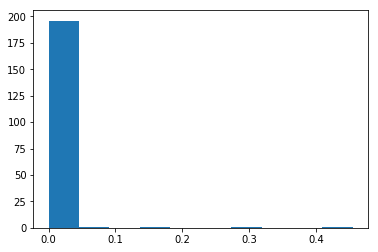

In [15]:
indices1, _ = hist_and_support(pca.weights)

In [16]:
pca1 = dill.load(open(filename, 'rb'))
subweights = pca.weights[indices1]
pca1.controlset = [pca1.controlset[i] for i in indices1]
pca1.probs = list(np.array(subweights.T/sum(subweights)).T)

In [17]:
# Save the weighted controls

import dill
dill.dump(pca0, open('0_' + filename, 'wb'))

import dill
dill.dump(pca1, open('1_' + filename, 'wb'))

# Diamond Norm

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
from ipyparallel import Client
rc = Client(profile='mpi3')
dc = rc[:]

/home/anthony/.pyenv/versions/3.6.3/envs/personal/lib/python3.6/site-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@GLaDOS')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


In [20]:
import os
dc.push({'cwd':os.getcwd()})

<AsyncResult: _push>

In [21]:
%%px
import os
os.chdir(cwd)

In [22]:
%%px
import dill
import itertools
import numpy as np
from pauli_channel_approximation import compute_dpn_and_fid
import matplotlib.pyplot as plt
from itertools import product

In [23]:
%%px 
from mpi4py import MPI
comm = MPI.COMM_WORLD
rank = comm.Get_rank()

In [24]:
%%px
filename = 'pickled_controls5.pkl'
pca0 = dill.load(open('0_' + filename, 'rb')) # 0RBC
pca1 = dill.load(open('1_' + filename, 'rb')) # 1RBC

got unknown result: 65a3244a-2488d1b74b34b53ec8f9d838
got unknown result: 679964e9-701f51a916f8c37905392a5f


# Diamond Norm

In [25]:
%%px
import sys
import itertools
from itertools import product
from copy import deepcopy
from functools import reduce

from diamond import diamond_norm, jamiolkowski

def superoperator(unitary):

    return np.kron(unitary.conj(), unitary)

def choi_form(unitary):

    return jamiolkowski(superoperator(unitary))

# misdefining this as accepting unitaries when it takes superoperators seems to have no effect on the diamond norm - strange.
# def diamond_distance(unitary_a,unitary_b):
#     return diamond_norm(choi_form(unitary_a) - choi_form(unitary_b))/2.

def diamond_distance(sopa, sopb):
    rtn = (jamiolkowski(sopa) - jamiolkowski(sopb))/2
    return diamond_norm(rtn)

def compute_diamond_norm(data):
    controlset, ambient_hamiltonian0, combo, dt, control_hamiltonians, target_operator, probs = data
    print("DOING COMBO {}".format(combo))
    sys.stdout.flush()
    fidelities = []
    projs = []
    sops = []
    controlset_unitaries = []
    d_norms = []

    for controls in controlset:
        newcontrols = deepcopy(controls)
        ambient_hamiltonian = [deepcopy(ah).astype("complex") for ah in ambient_hamiltonian0]
        for cnum, value in enumerate(combo):
            cnum -= len(ambient_hamiltonian0)
            if cnum >= 0:
                newcontrols[:, cnum] = newcontrols[:, cnum] * (1 + value)
            if cnum < 0:
                ambient_hamiltonian[cnum] *= float(value)
        print(ambient_hamiltonian, control_hamiltonians)
        step_unitaries = control_unitaries(ambient_hamiltonian,
                                           control_hamiltonians, newcontrols,
                                           dt)
        unitary = reduce(lambda a, b: a.dot(b), step_unitaries)
        sop = error_unitary(unitary, target_operator)
        sops.append(sop)
        d_norms.append(diamond_distance(sop, np.eye(sop.shape[0])))
    avg_sop = reduce(lambda a, b: a + b, [prob * sops[i] for i, prob in enumerate(probs)])
    d_norms.append(diamond_distance(avg_sop, np.eye(avg_sop.shape[0])))
    return d_norms

In [26]:
%%px
num_pts = 3
#pca0 and pca1 should have the same detunings, so we just use pca0 here.
base = 100*np.logspace(-4.7, np.log(pca0.detunings[0][0])/np.log(10), (num_pts - 1)/2)
controls = np.concatenate([np.sort(-base),np.array([0]), base])
combinations0 = [[det,0, 0] for det in controls]

controls = np.concatenate([np.sort(-base),np.array([0]), base])
combinations1 = [[0,det, det] for det in controls]

got unknown result: 93f976c8-810d486371de2a781b9d2e93


In [27]:
%%px
from pauli_channel_approximation import control_unitaries, error_unitary
def dnorms(pca):
    try:
        combo = combinations0[rank]
        #was pca0, probably the bug
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms0 = compute_diamond_norm(lst)

        combo = combinations1[rank]
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms1 = compute_diamond_norm(lst)
    except IndexError:
        pass
    return d_norms0, d_norms1

# 0RBC

In [28]:
%%px
combo = combinations0[rank]
d_norms00, d_norms01 = dnorms(pca0)

[stdout:0] 
DOING COMBO [-0.0019952623149688785, 0, 0]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.

# 1RBC

In [29]:
%%px
d_norms10, d_norms11 = dnorms(pca1)

[stdout:0] 
DOING COMBO [-0.0019952623149688785, 0, 0]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.        +0.j,  0.00199526-0.j]])] [array([[0, 1],
       [1, 0]]), array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])]
[array([[-0.00199526+0.j, -0.        +0.j],
       [-0.

In [30]:
num_pts=3

In [31]:
diamond_norms00 = np.array([rc[i]['d_norms00'] for i in range(num_pts)])
diamond_norms01 = np.array([rc[i]['d_norms01'] for i in range(num_pts)])

got unknown result: 7fd715b2-352d89071edfdd0aee9435b1


In [32]:
diamond_norms10 = np.array([rc[i]['d_norms10'] for i in range(num_pts)])
diamond_norms11 = np.array([rc[i]['d_norms11'] for i in range(num_pts)])

In [33]:
num_pts = 3
controls = np.array([rc[i]['combo'][0] for i in range(num_pts)])

# If we don't include enough controls (say 20) the two plots will look similar. Need more controls for more diversity in the solutions.

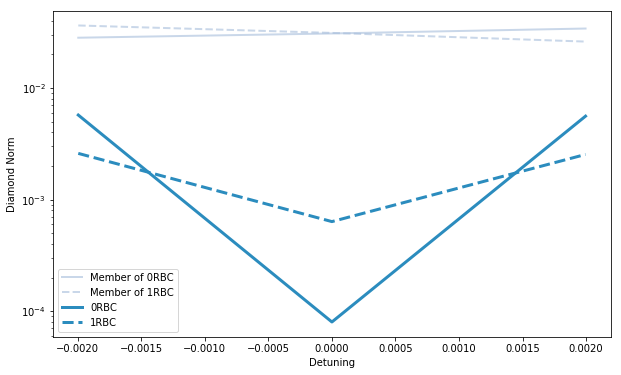

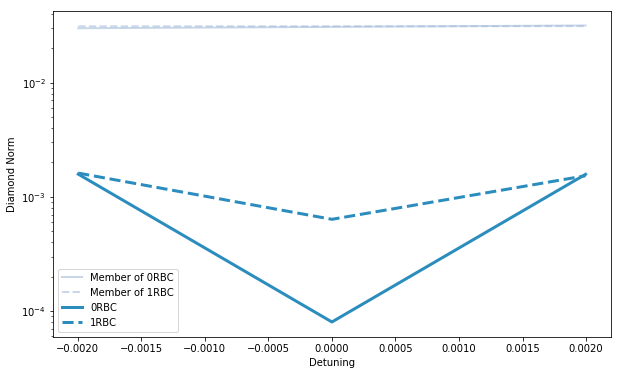

In [34]:
for a, b in ((diamond_norms00, diamond_norms10), (diamond_norms01, diamond_norms11)):
    plt.figure(figsize=(10,6))
    plt.semilogy(controls, np.array(a).T[7], linewidth = 2, alpha=.6, color='#a6bddb', label="Member of 0RBC", ls="-");
    plt.semilogy(controls, np.array(b).T[7], linewidth = 2, alpha=.6, color='#a6bddb', label="Member of 1RBC", ls="--");


    plt.semilogy(controls, np.array(a).T[-1], linewidth = 3, alpha=1, color='#2b8cbe', label="0RBC", ls="-");
    plt.semilogy(controls,np.array(b).T[-1], linewidth = 3, alpha=1, color='#2b8cbe', label="1RBC", ls="--");
    plt.ylabel("Diamond Norm")
    plt.xlabel("Detuning")
    plt.legend()